In [1]:
from pandas import read_csv
from pandas import Series
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import numpy
import pandas

# LOAD DATA

In [13]:
# load data
series = pandas.read_csv('ihk_new.csv')
series.head(10)

,month,value
0,2014-01,110.99
1,2014-02,111.28
2,2014-03,111.37
3,2014-04,111.35
4,2014-05,111.53
5,2014-06,112.01
6,2014-07,113.05
7,2014-08,113.58
8,2014-09,113.89
9,2014-10,114.42


In [14]:
series.tail(10)

,month,value
56,2018-09,133.83
57,2018-10,134.20
58,2018-11,134.56
59,2018-12,135.39
60,2019-01,135.83
61,2019-02,135.72
62,2019-03,135.87
63,2019-04,136.47
64,2019-05,137.40
65,2019-06,138.16


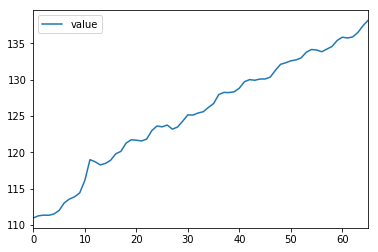

In [15]:
series.plot()

# SPLIT DATA

Jumlah Data Total : 66
Jumlah Data Train : 49
Jumlah Data Test : 17


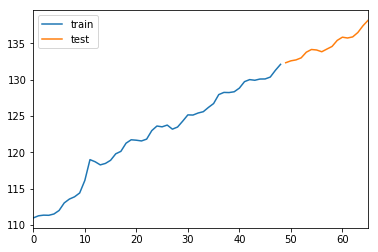

In [16]:
#split data
train = series[:int(0.75*(len(series)))]
test = series[int(0.75*(len(series))):]

print("Jumlah Data Total :", len(series))
print("Jumlah Data Train :", len(train))
print("Jumlah Data Test :", len(test))

train['value'].plot(label='train')
test['value'].plot(label='test')
pyplot.legend()

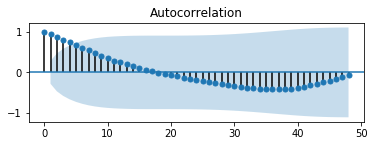

In [17]:
# plot acf
pyplot.subplot(211)
plot_acf(train['value'], ax=pyplot.gca())
pyplot.show()

C:\Users\nndapsra\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


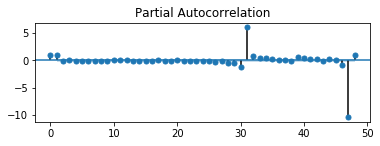

In [18]:
# plot pacf
pyplot.subplot(211)
plot_pacf(train['value'], ax=pyplot.gca())
pyplot.show()

In [19]:
#preprocessing (get value only)
train = train.value.values
test = test.value.values

In [33]:
# walk-forward validation
history = [x for x in train]
predictions = list()
months_in_year = 12

for i in range(len(test)): 
   
    # predict
    model = ARIMA(history, order=(1,0,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    
    # observation
    obs = test[i]
    history.append(obs)
    
    print('predicted=%f, expected=%f' % (yhat, obs))
    
    #save model for next prediction
    model_fit.save('model.pkl')

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

# DIFFERENCING

In [53]:
# create a differenced series
def difference(dataset, interval):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        #print('perhitungan value ke ',i,' --> ',dataset[i],' - ',dataset[i-interval],' = ',value)
        diff.append(value)
    return diff

In [22]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

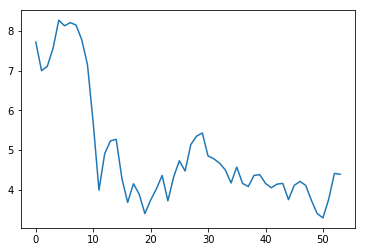

In [54]:
# difference data
diff = difference(series['value'], 12)
pyplot.plot(diff)
pyplot.show()

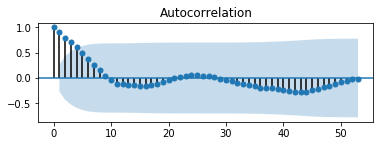

In [55]:
# plot acf
pyplot.subplot(211)
plot_acf(diff, ax=pyplot.gca())
pyplot.show()

C:\Users\nndapsra\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


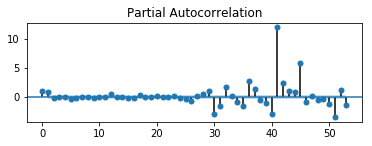

In [56]:
# plot pacf
pyplot.subplot(211)
plot_pacf(diff, ax=pyplot.gca())
pyplot.show()

# PREDICTION OF DATA TEST

In [57]:
# walk-forward validation
history = [x for x in train]
predictions = list()
months_in_year = 12

for i in range(len(test)): 
    
    # predict
    model = ARIMA(diff, order=(2,1,2))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    
    # observation
    obs = test[i]
    history.append(obs)
    
    print('predicted=%f, expected=%f' % (yhat, obs))
    
    #save model for next prediction
    model_fit.save('model.pkl')

predicted=132.425328, expected=132.320000
predicted=132.405328, expected=132.580000
predicted=132.515328, expected=132.710000
predicted=133.015328, expected=132.990000
predicted=133.905328, expected=133.770000
predicted=134.185328, expected=134.140000
predicted=134.095328, expected=134.070000
predicted=134.265328, expected=133.830000
predicted=134.275328, expected=134.200000
predicted=134.535328, expected=134.560000
predicted=135.465328, expected=135.390000
predicted=136.285328, expected=135.830000
predicted=136.505328, expected=135.720000
predicted=136.765328, expected=135.870000
predicted=136.895328, expected=136.470000
predicted=137.175328, expected=137.400000
predicted=137.955328, expected=138.160000


# RMSE

MSE: 0.130
RMSE: 0.360


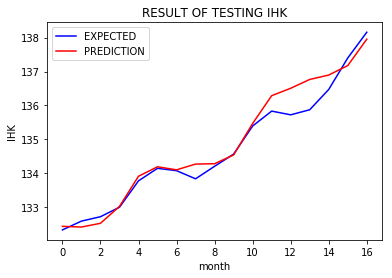

In [58]:
# report performance
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)

print('MSE: %.3f' % mse)
print('RMSE: %.3f' % rmse)

pyplot.plot(test, color='blue' , label='EXPECTED')
pyplot.plot(predictions, color='red' , label='PREDICTION')
pyplot.xlabel("month")
pyplot.ylabel("IHK")
pyplot.title("RESULT OF TESTING IHK")
pyplot.legend()
pyplot.show()